Determine which car to buy Hybrid, Electric, Gasoline, Diesel based on their MPG

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier

In [2]:
df_gasoline_car = pd.read_csv('Data/CarsData.csv')
df_electric_car = pd.read_csv('Data/Electric_Vehicle_Population_Data.csv')

In [3]:
df_gasoline_car.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [4]:
df_electric_car.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
df_electric_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [6]:
df_gasoline_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [7]:
df_electric = df_electric_car.drop(df_electric_car.columns[[0,1,2,3,4,9,12,13,14,15,16]], axis=1)

In [8]:
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Model Year             150482 non-null  int64 
 1   Make                   150482 non-null  object
 2   Model                  150482 non-null  object
 3   Electric Vehicle Type  150482 non-null  object
 4   Electric Range         150482 non-null  int64 
 5   Base MSRP              150482 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 6.9+ MB


In [9]:
df_gasoline = df_gasoline_car.drop(df_gasoline_car.columns[[3,4,6,8]], axis=1)

In [10]:
df_gasoline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   fuelType      97712 non-null  object 
 4   mpg           97712 non-null  float64
 5   Manufacturer  97712 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.5+ MB


In [11]:
df_gasoline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   fuelType      97712 non-null  object 
 4   mpg           97712 non-null  float64
 5   Manufacturer  97712 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.5+ MB


In [12]:
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Model Year             150482 non-null  int64 
 1   Make                   150482 non-null  object
 2   Model                  150482 non-null  object
 3   Electric Vehicle Type  150482 non-null  object
 4   Electric Range         150482 non-null  int64 
 5   Base MSRP              150482 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 6.9+ MB


In [13]:
df_electric.rename(columns={'Model Year': 'year', 'Model': 'model', 'Electric Range': 'mpg', 'Base MSRP': 'price', 'Electric Vehicle Type': 'fuelType', 'Make': 'Manufacturer'}, inplace=True)


In [14]:
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          150482 non-null  int64 
 1   Manufacturer  150482 non-null  object
 2   model         150482 non-null  object
 3   fuelType      150482 non-null  object
 4   mpg           150482 non-null  int64 
 5   price         150482 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 6.9+ MB


In [15]:
df_gasoline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   fuelType      97712 non-null  object 
 4   mpg           97712 non-null  float64
 5   Manufacturer  97712 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.5+ MB


In [16]:
df_gasoline.loc[:,['year', 'Manufacturer', 'model', 'fuelType', 'mpg', 'price']]

,year,Manufacturer,model,fuelType,mpg,price
0,2017,hyundi,I10,Petrol,60.1,7495
1,2017,volkswagen,Polo,Petrol,58.9,10989
2,2019,BMW,2 Series,Diesel,49.6,27990
3,2017,skoda,Yeti Outdoor,Diesel,62.8,12495
4,2017,ford,Fiesta,Petrol,54.3,7999
...,...,...,...,...,...,...
97707,2017,ford,Fiesta,Petrol,54.3,10447
97708,2014,BMW,3 Series,Diesel,61.4,14995
97709,2017,ford,Fiesta,Petrol,54.3,8950
97710,2017,vauxhall,Astra,Petrol,50.4,10700


In [17]:
df_combined = pd.concat([df_gasoline, df_electric])

In [18]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248194 entries, 0 to 150481
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         248194 non-null  object 
 1   year          248194 non-null  int64  
 2   price         248194 non-null  int64  
 3   fuelType      248194 non-null  object 
 4   mpg           248194 non-null  float64
 5   Manufacturer  248194 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 13.3+ MB


In [19]:
df_combined.describe()

,year,price,mpg
count,248194.000000,248194.000000,248194.000000
mean,2018.848401,7399.455349,62.888889
std,3.056324,12127.102784,75.867944
min,1970.000000,0.000000,0.000000
25%,2017.000000,0.000000,0.000000
50%,2019.000000,0.000000,47.100000
75%,2022.000000,12495.000000,67.300000
max,2024.000000,845000.000000,470.800000


In [20]:
print("\nDescriptive Statistics of Categorical Variables")
df_combined.describe(include=['object', 'category'])


Descriptive Statistics of Categorical Variables


,model,fuelType,Manufacturer
count,248194,248194,248194
unique,323,7,45
top,MODEL Y,Battery Electric Vehicle (BEV),TESLA
freq,28502,116807,68983


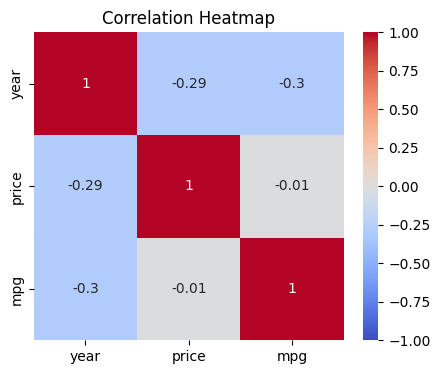

In [21]:
# Selecting numerical features only
df_numeric = df_combined.select_dtypes(include=['float64', 'int64'])

# Heatmap on numerical features
plt.figure(figsize=(5, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

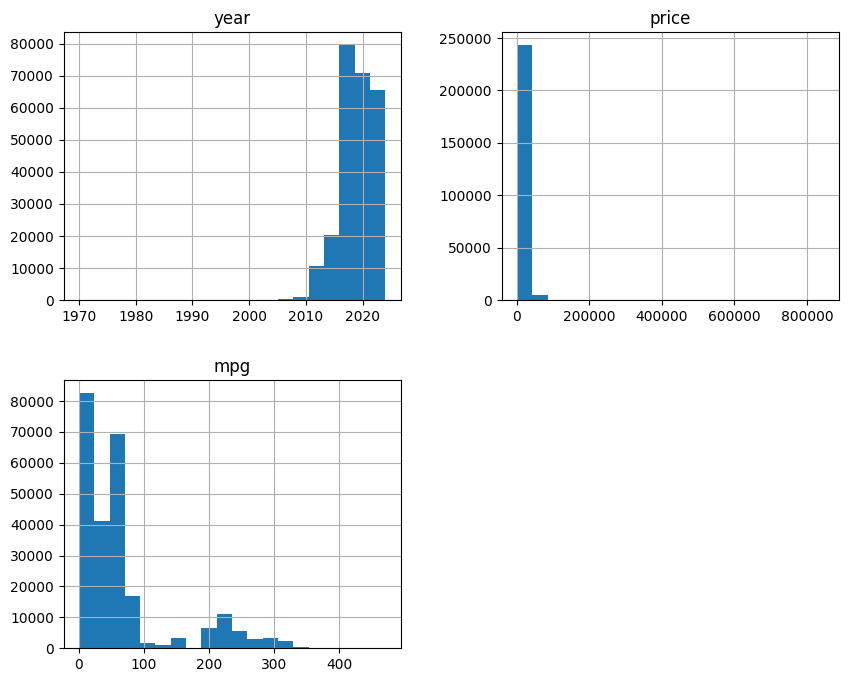

In [22]:
df_numeric.hist(bins=20, figsize=(10, 8))
plt.show()

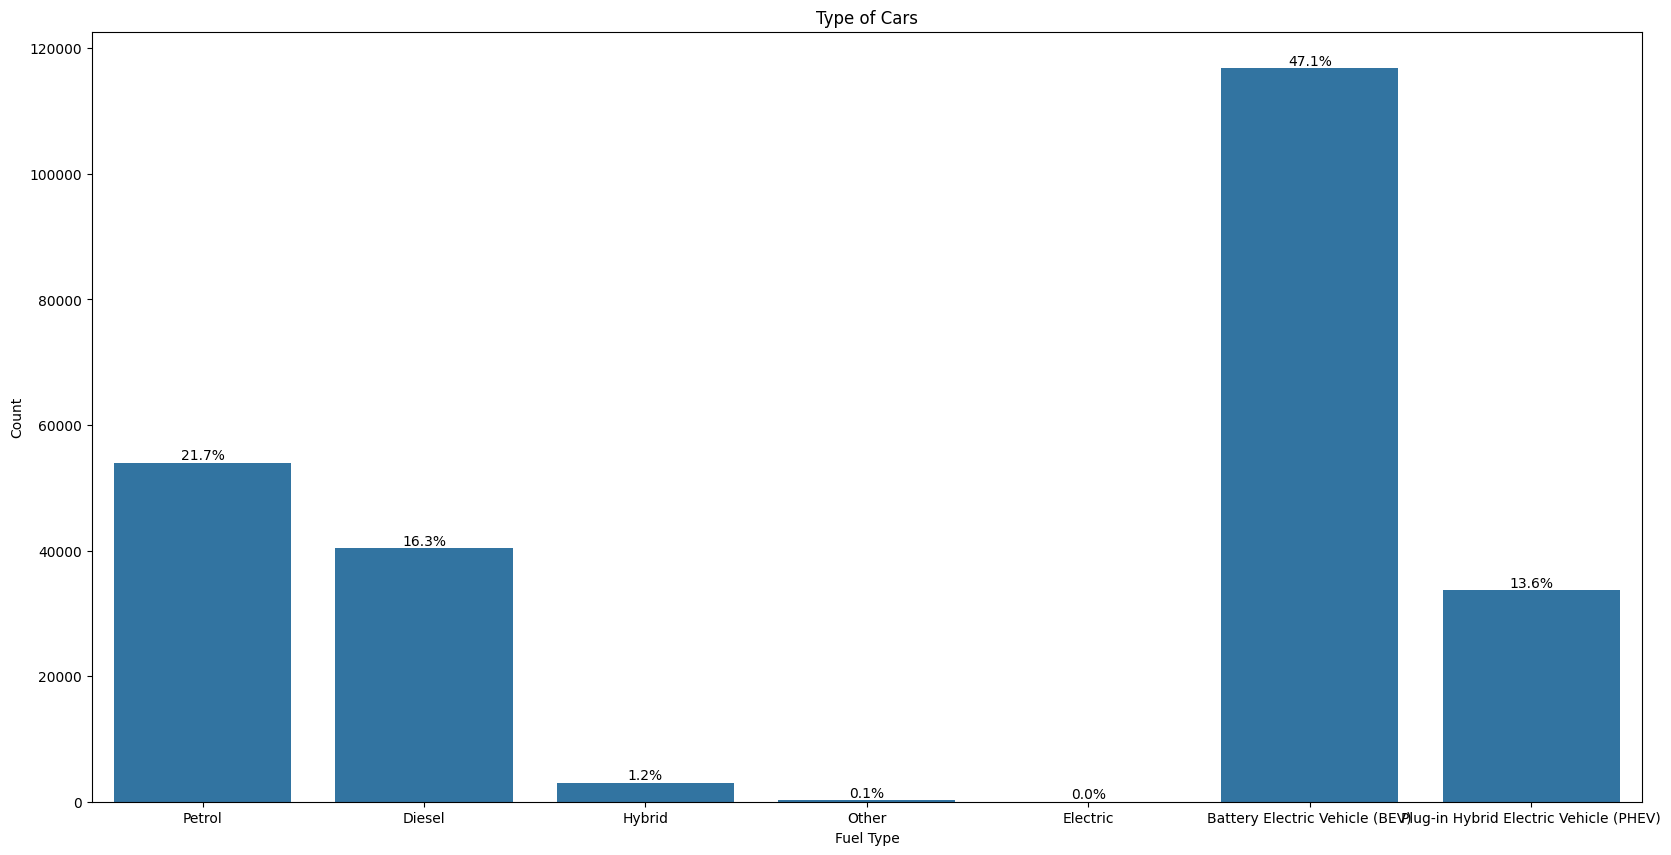

In [23]:
# Plot Survival with percentages on top of each bar
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='fuelType', data=df_combined)

# Calculate percentages and annotate the bars
total = len(df_combined)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() /2  # X position for the label
    y = p.get_height()  # Y position for the label
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Type of Cars')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [24]:
df_combined.loc[df_combined['fuelType'] == 'Electric', 'fuelType'] = 'Battery Electric Vehicle (BEV)' 
print(df_combined)

                model  year  price                                fuelType  \
0                 I10  2017   7495                                  Petrol   
1                Polo  2017  10989                                  Petrol   
2            2 Series  2019  27990                                  Diesel   
3        Yeti Outdoor  2017  12495                                  Diesel   
4              Fiesta  2017   7999                                  Petrol   
...               ...   ...    ...                                     ...   
150477             I4  2023      0          Battery Electric Vehicle (BEV)   
150478        MODEL 3  2023      0          Battery Electric Vehicle (BEV)   
150479        MODEL Y  2021      0          Battery Electric Vehicle (BEV)   
150480             X5  2023      0  Plug-in Hybrid Electric Vehicle (PHEV)   
150481        MODEL Y  2022      0          Battery Electric Vehicle (BEV)   

         mpg Manufacturer  
0       60.1       hyundi  
1      

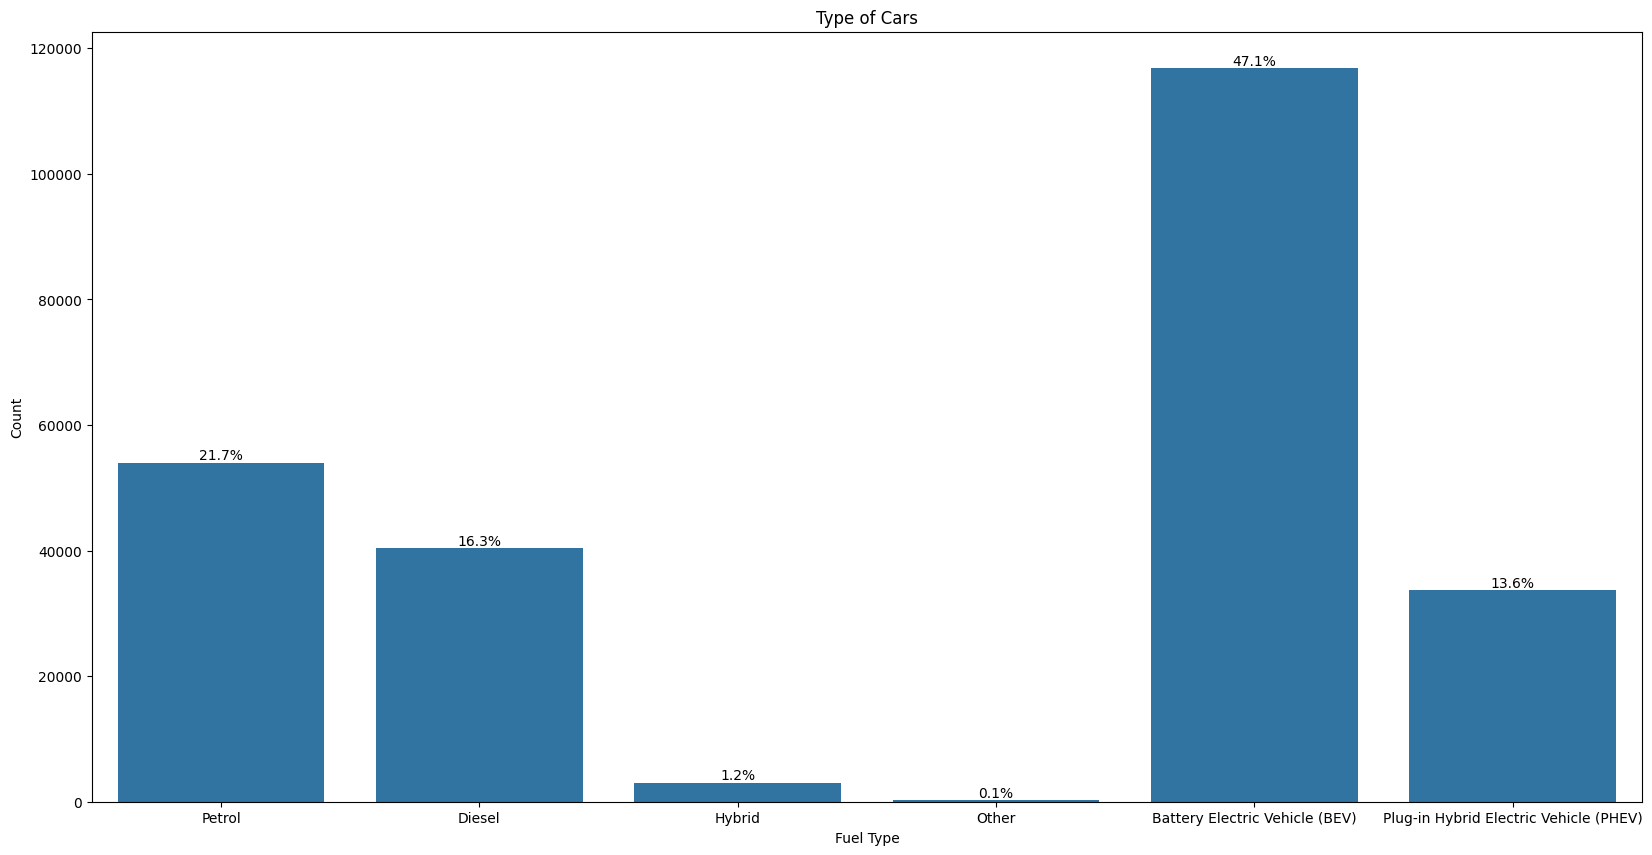

In [25]:
# Plot Survival with percentages on top of each bar
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='fuelType', data=df_combined)

# Calculate percentages and annotate the bars
total = len(df_combined)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() /2  # X position for the label
    y = p.get_height()  # Y position for the label
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Type of Cars')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [26]:
df_o = df_combined[df_combined['fuelType'] == 'Other']
print(df_o)

           model  year  price fuelType    mpg Manufacturer
445     3 Series  2017  15300    Other  148.7          BMW
544        Prius  2015  21990    Other   64.2       toyota
698        Prius  2019  24395    Other   61.4       toyota
895        Fabia  2017  10980    Other   60.1        skoda
1292       Ioniq  2017  12800    Other   78.5       hyundi
...          ...   ...    ...      ...    ...          ...
96298     Tiguan  2017  25995    Other   38.2   volkswagen
96418       Aygo  2017   9495    Other   67.3       toyota
96562   3 Series  2016  14475    Other  134.5          BMW
97259       RAV4  2017  18000    Other   43.5       toyota
97544      Prius  2016  15795    Other  134.5       toyota

[246 rows x 6 columns]


In [27]:
df_combined = df_combined.drop(df_combined.loc[df_combined['fuelType'] == 'Other'].index)
print(df_combined)


                model  year  price                                fuelType  \
0                 I10  2017   7495                                  Petrol   
1                Polo  2017  10989                                  Petrol   
2            2 Series  2019  27990                                  Diesel   
3        Yeti Outdoor  2017  12495                                  Diesel   
4              Fiesta  2017   7999                                  Petrol   
...               ...   ...    ...                                     ...   
150477             I4  2023      0          Battery Electric Vehicle (BEV)   
150478        MODEL 3  2023      0          Battery Electric Vehicle (BEV)   
150479        MODEL Y  2021      0          Battery Electric Vehicle (BEV)   
150480             X5  2023      0  Plug-in Hybrid Electric Vehicle (PHEV)   
150481        MODEL Y  2022      0          Battery Electric Vehicle (BEV)   

         mpg Manufacturer  
0       60.1       hyundi  
1      

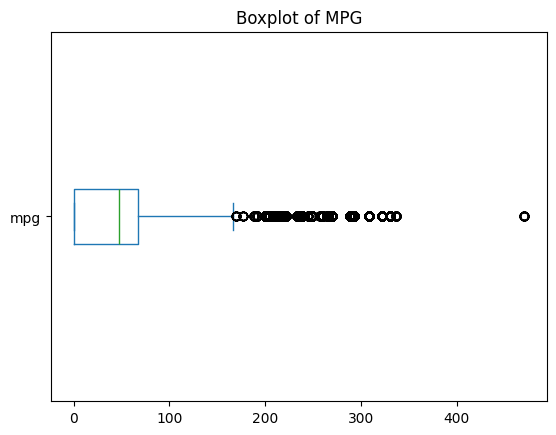

In [28]:
df_combined['mpg'].plot(kind = 'box', vert = False, title = "Boxplot of MPG");

In [29]:

# Drop rows where 'column_name' has zero values
df_combined = df_combined[df_combined['price'] != 0]
df_combined = df_combined[df_combined['mpg'] != 0]


Outlier Treatment

In [30]:
Q1 = df_combined['price'].quantile(0.25)
Q3 = df_combined['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values outside the bounds
df_combined['price'] = df_combined['price'].clip(lower=lower_bound, upper=upper_bound)

Bivariate Analysis

In [31]:
corr = df_combined.corr(numeric_only = True)


<Axes: >

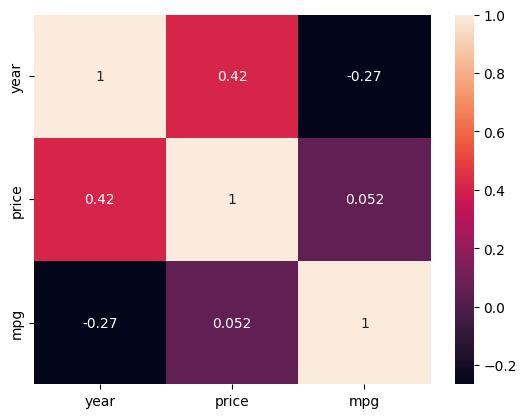

In [32]:
sns.heatmap(corr, annot = True)


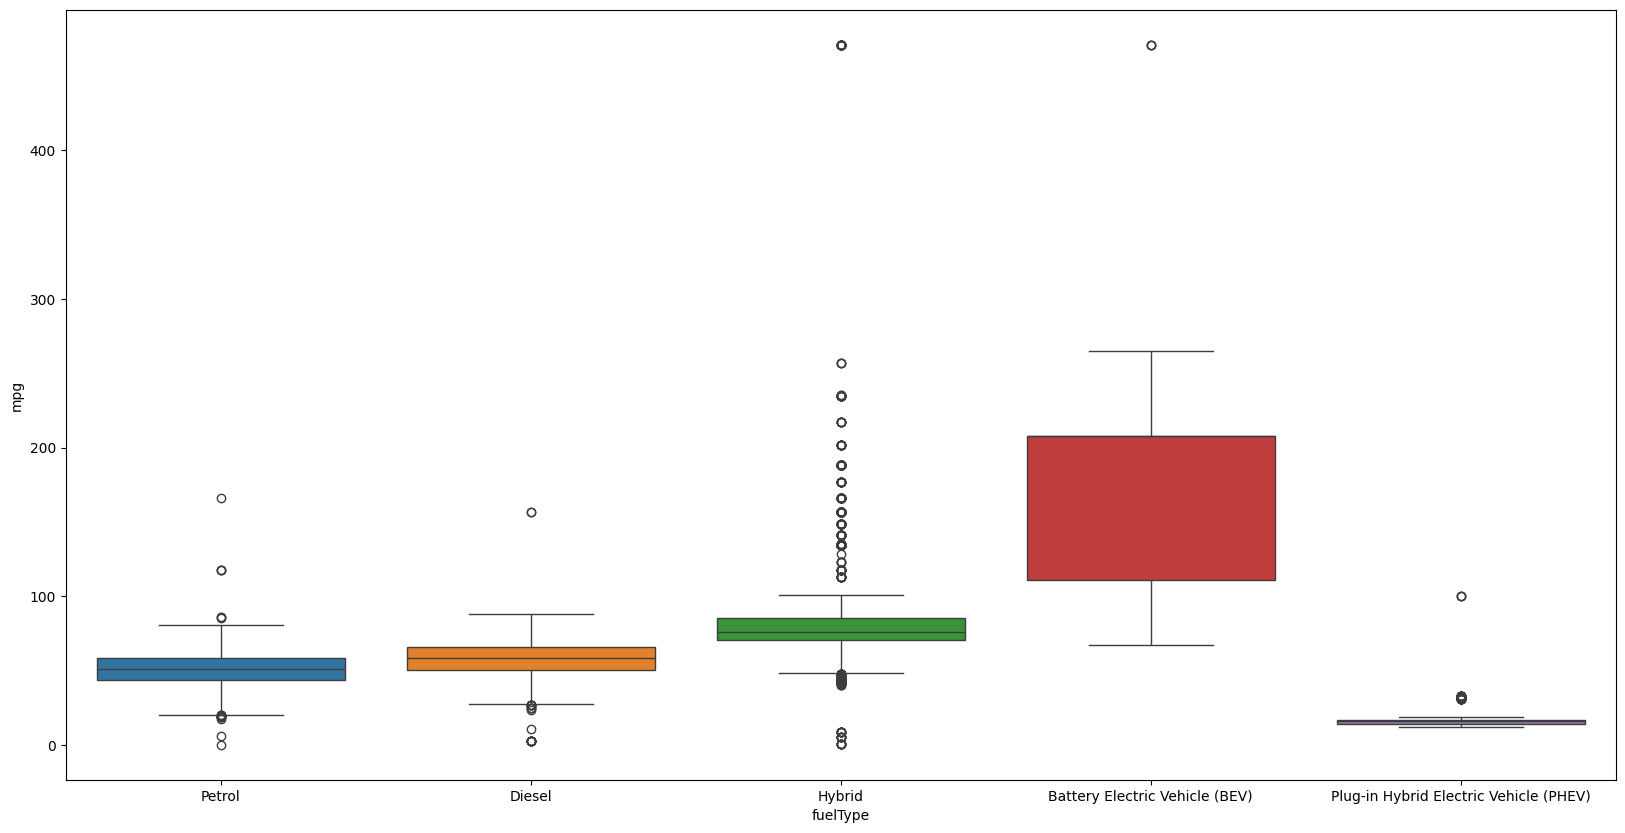

In [33]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'fuelType', y = 'mpg', data = df_combined, hue = "fuelType");


In [ ]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
df_combined['price_normalized'] = scaler.fit_transform(df_combined[['price']])

print(df_combined[['price', 'price_normalized']].head())

   price  price_normalized
0   7495         -1.057303
1  10989         -0.673558
2  27990          1.193660
3  12495         -0.508154
4   7999         -1.001949


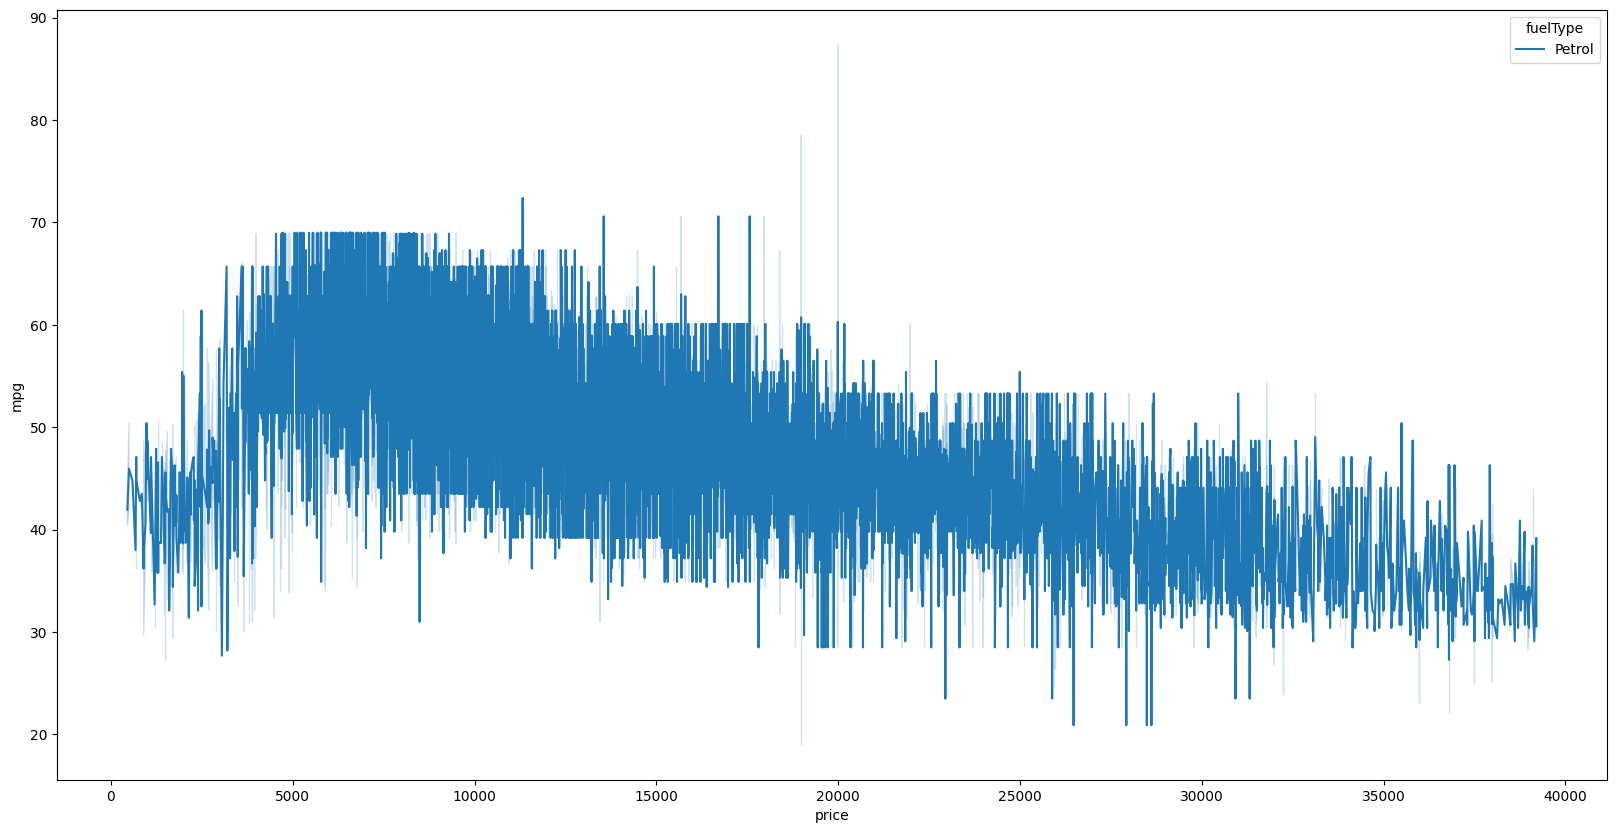

In [35]:
plt.figure(figsize=(20, 10))
df_petrol = df_combined[df_combined['fuelType'] == "Petrol"]
sns.lineplot(x = 'price', y = 'mpg', data = df_petrol, hue = "fuelType");

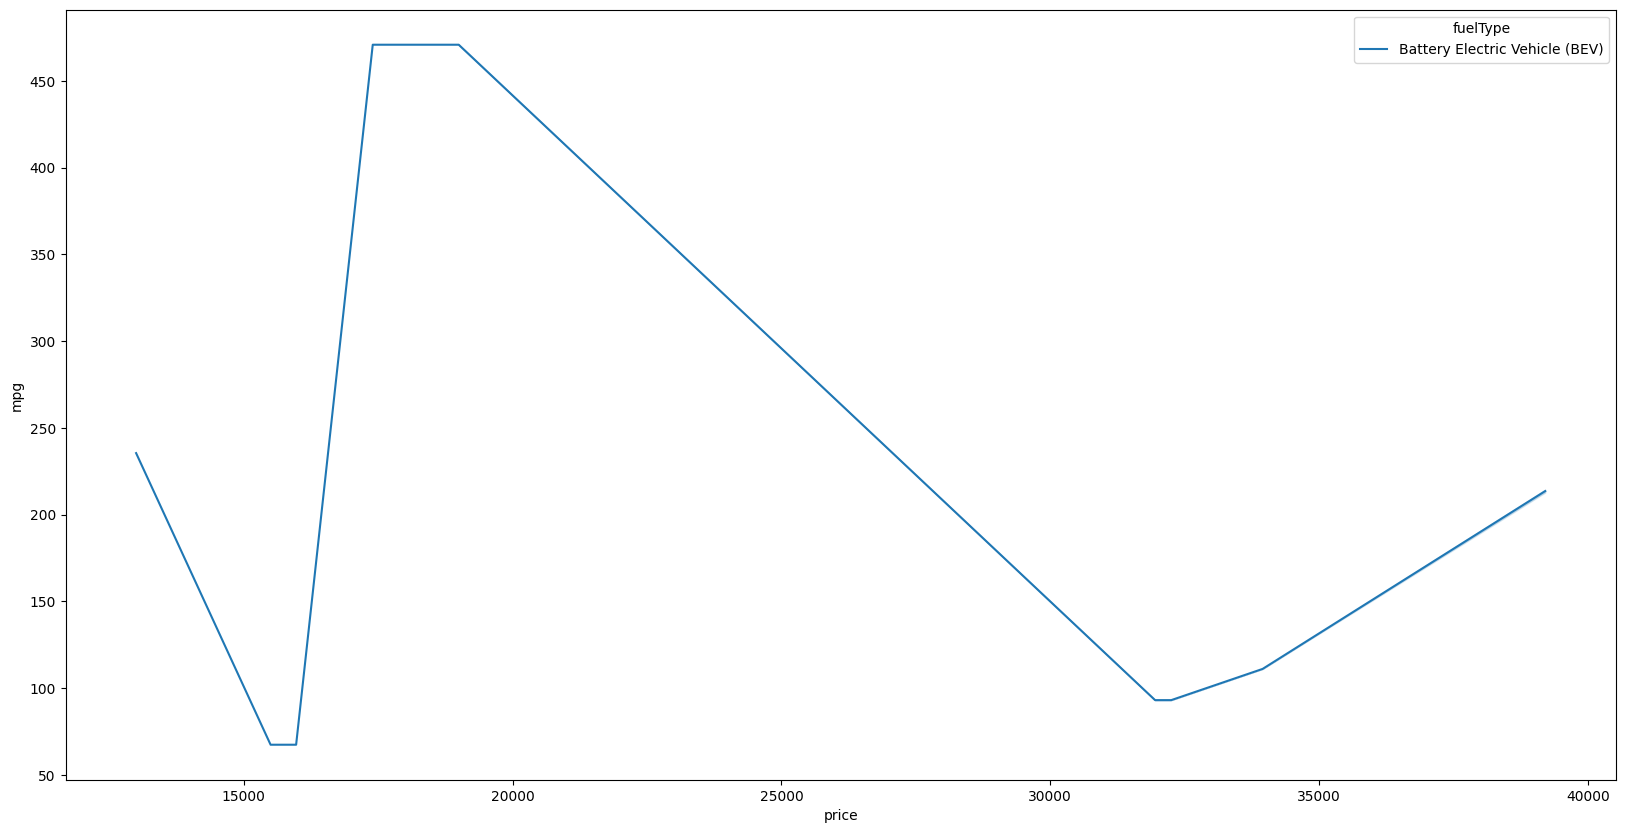

In [36]:
plt.figure(figsize=(20, 10))
df_BEV = df_combined[df_combined['fuelType'] == "Battery Electric Vehicle (BEV)"]
sns.lineplot(x = 'price', y = 'mpg', data = df_BEV, hue = "fuelType");


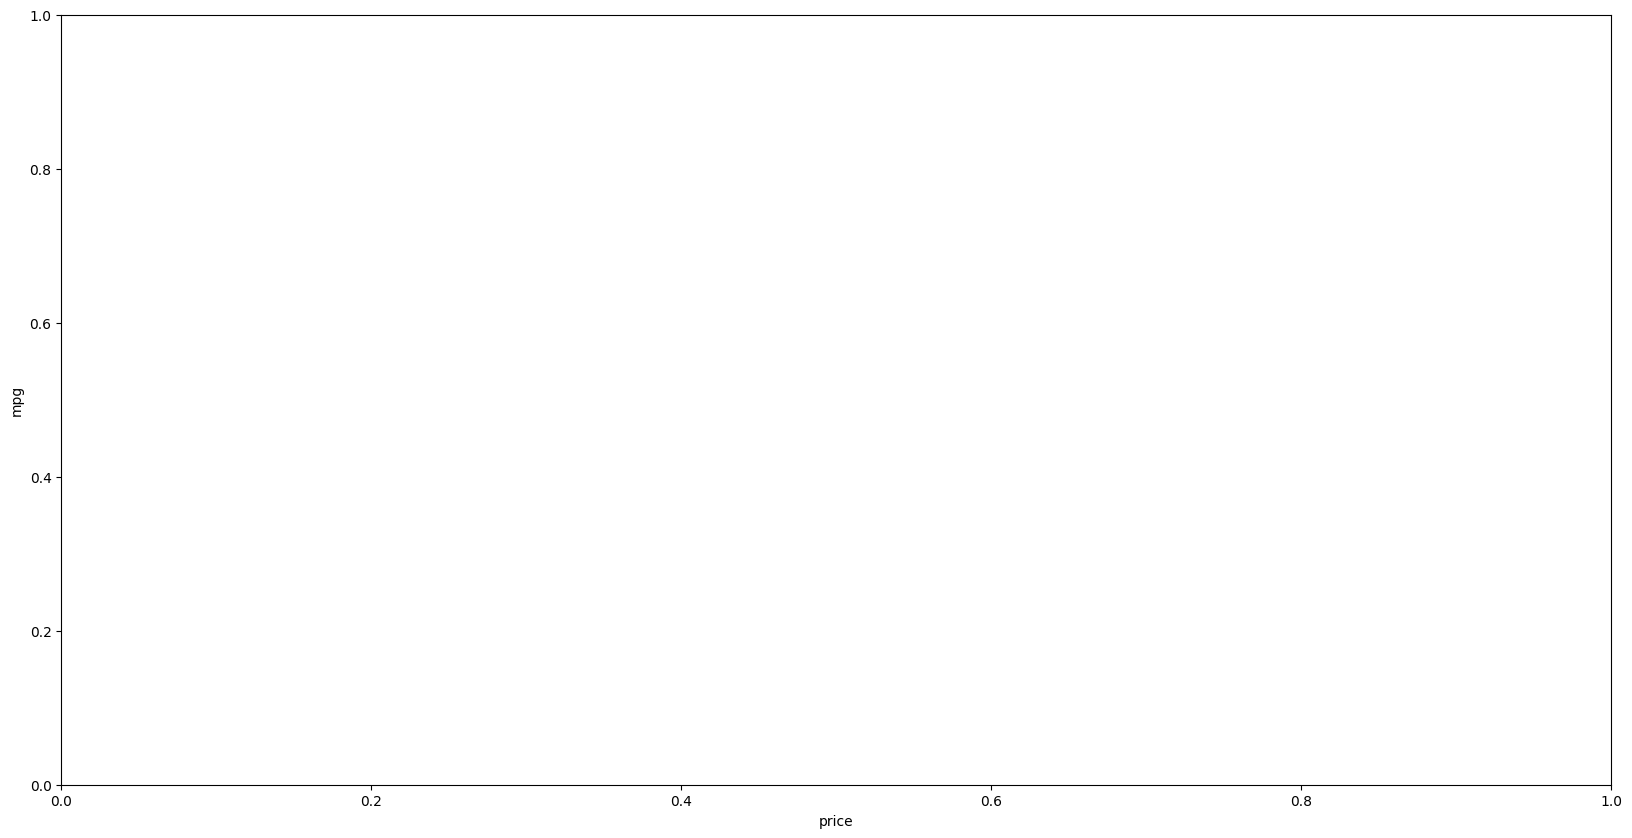

In [37]:
plt.figure(figsize=(20, 10))
df_phev = df_combined[df_combined['fuelType'] == "Plug-in Hybrid ElectricVehicle (PHEV)"]
sns.lineplot(x = 'price', y = 'mpg', data = df_phev, hue = "fuelType");


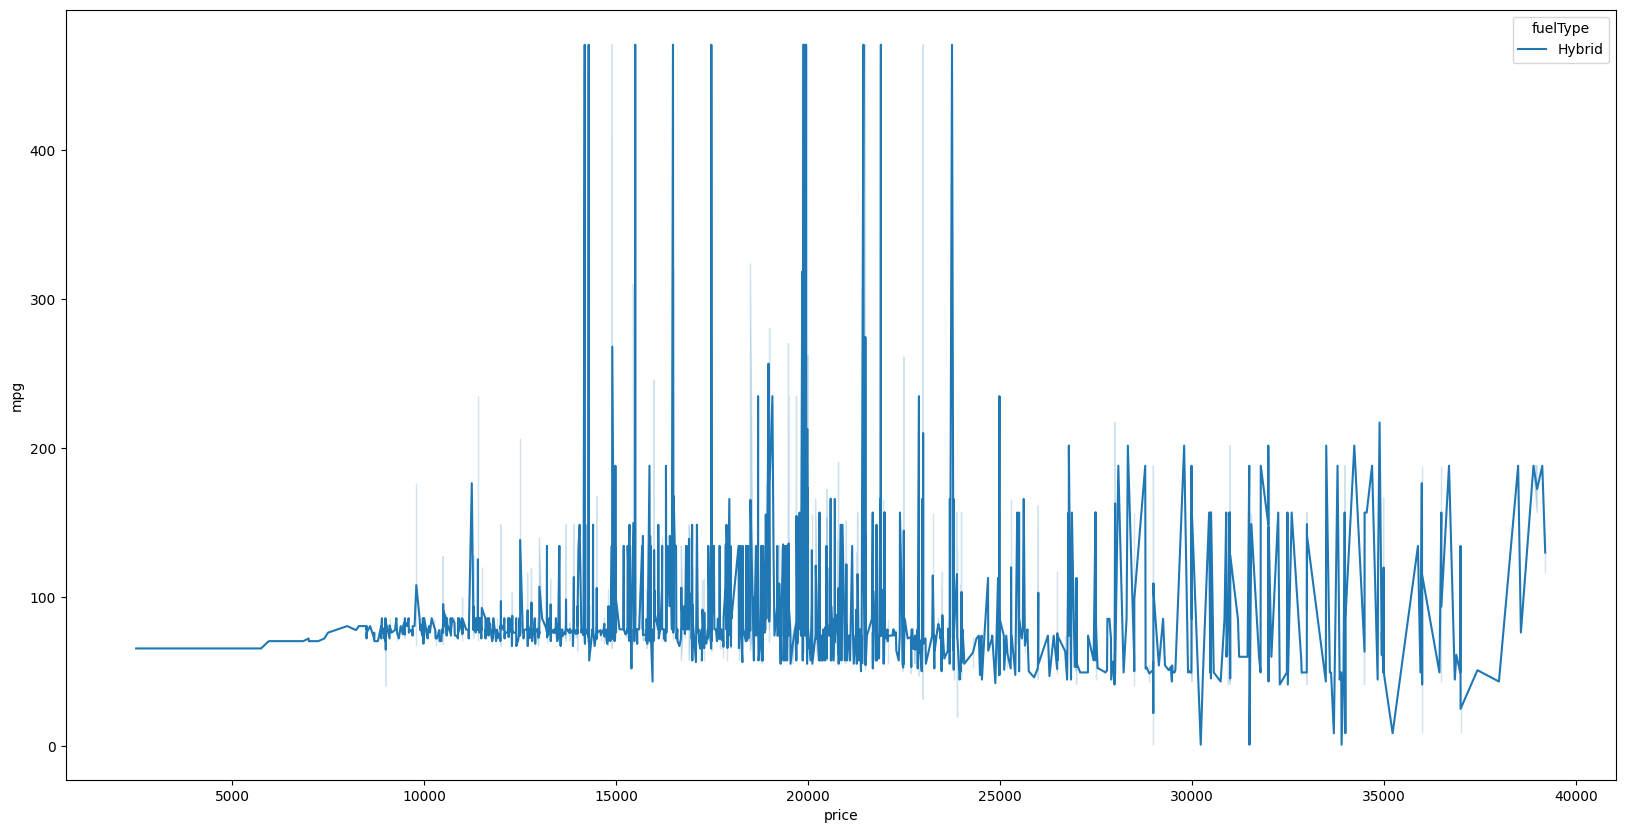

In [38]:
plt.figure(figsize=(20, 10))
df_hybrid = df_combined[df_combined['fuelType'] == "Hybrid"]
sns.lineplot(x = 'price', y = 'mpg', data = df_hybrid, hue = "fuelType");


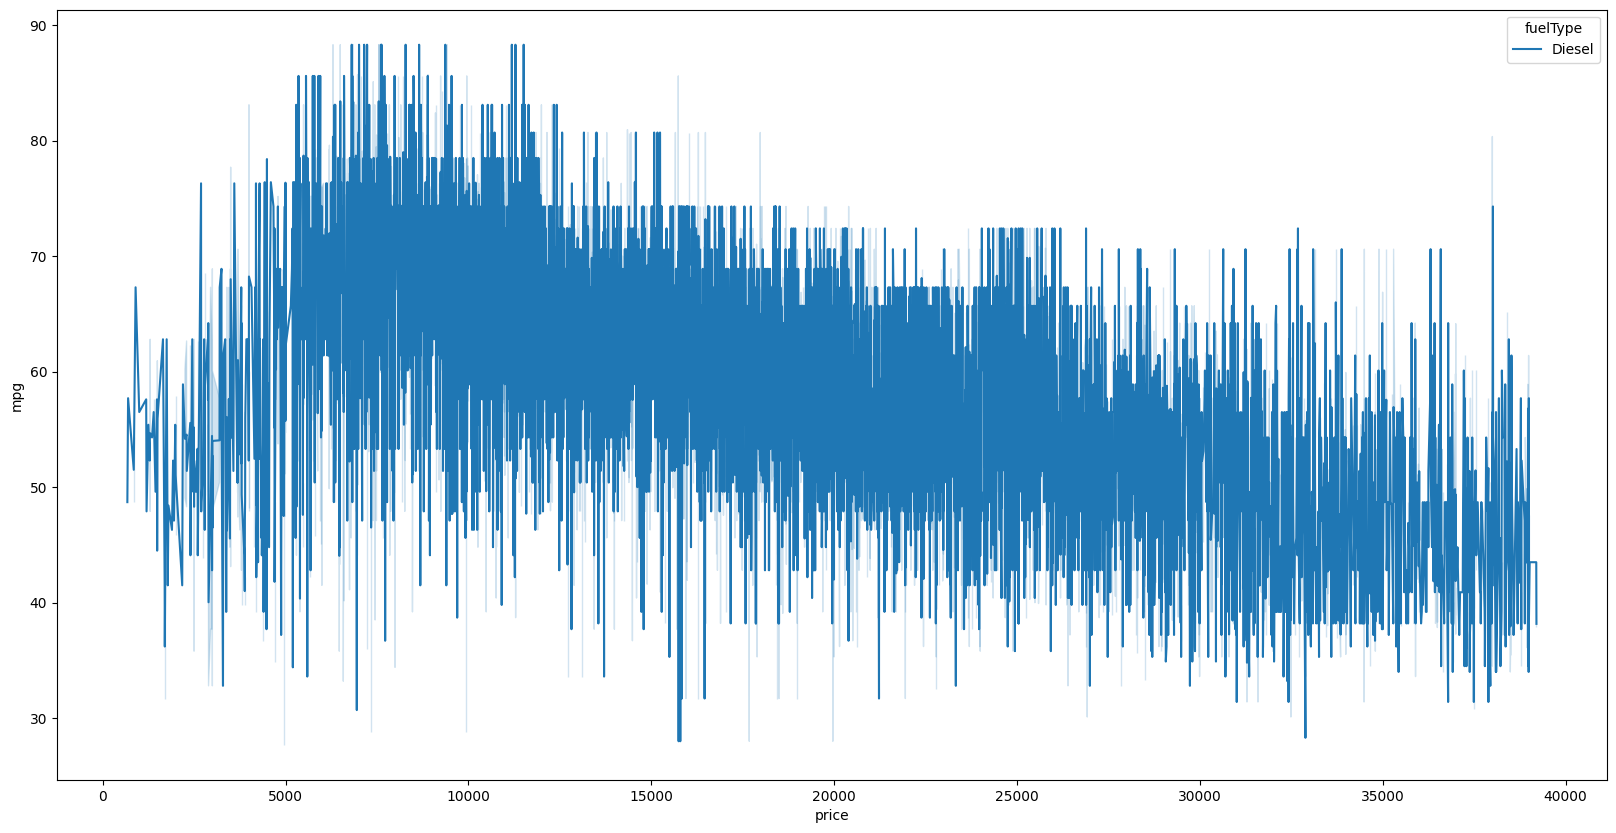

In [39]:
plt.figure(figsize=(20, 10))
df_diesel = df_combined[df_combined['fuelType'] == "Diesel"]
sns.lineplot(x = 'price', y = 'mpg', data = df_diesel, hue = "fuelType");


Splitting Data

In [40]:
X = df_combined.drop(columns = {'mpg','model','fuelType','year','Manufacturer','price'})
y = df_combined['mpg']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [43]:
print(X_train.shape)
print(X_test.shape)

print("=" * 50)

print(y_train.shape)
print(y_test.shape)

(80729, 1)
(20183, 1)
(80729,)
(20183,)


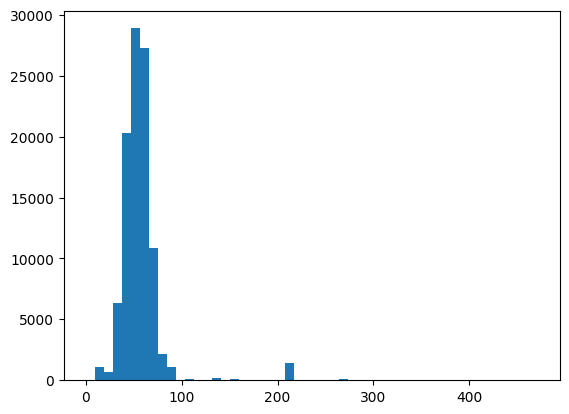

count    100912.000000
mean         57.466155
std          25.790679
min           0.300000
25%          46.300000
50%          54.300000
75%          62.800000
max         470.800000
Name: mpg, dtype: float64


In [44]:
import matplotlib.pyplot as plt  

plt.hist(y, bins=50)  # Check distribution of target variable
plt.show()

print(y.describe())  # Get min, max, mean, etc.

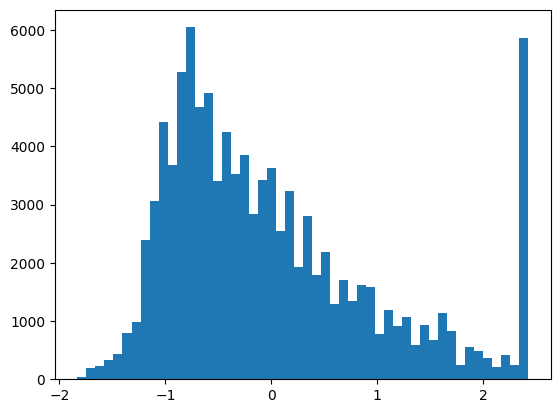

       price_normalized
count      1.009120e+05
mean       9.914026e-17
std        1.000005e+00
min       -1.831055e+00
25%       -7.607625e-01
50%       -2.551057e-01
75%        5.137036e-01
max        2.425403e+00


In [45]:
plt.hist(X, bins=50)  # Check distribution of target variable
plt.show()

print(X.describe())  # Get min, max, mean, etc.

In [46]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor()

In [47]:
# fit the model
from sklearn.metrics import mean_squared_error


dummy.fit(X_train, y_train)

# R^2 of the model
dummy_r2 = dummy.score(X_train, y_train)
print("The value of dummy_r2 is {:.2f}".format(dummy_r2))

# Predictions on test 
dummy_predict = dummy.predict(X_test)

# rmse
dummy_rmse = mean_squared_error(y_test, dummy_predict)
print("The value of dummy rmse is {:.2f}".format(dummy_rmse))

The value of dummy_r2 is 0.00
The value of dummy rmse is 677.18


In [48]:
x = list(range(0, len(y_test)))

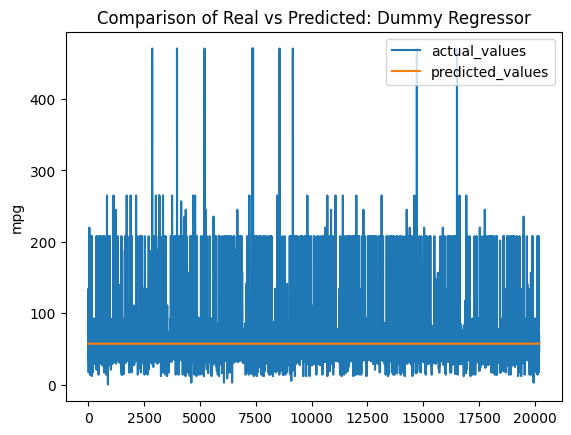

In [49]:
sns.lineplot(x = x, y = y_test, label = 'actual_values');
sns.lineplot(x = x, y = dummy_predict, label = 'predicted_values');

plt.title("Comparison of Real vs Predicted: Dummy Regressor");

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
lr = LinearRegression()
lr = Ridge(alpha=0.1)  # Adjust alpha as needed

In [51]:
# fit the model
lr.fit(X_train, y_train)

# R^2 of the model
lr_r2 = (lr.score(X_train, y_train))
print("The value of lr_r2 is {:.2f}".format(lr_r2))

# Predictions on test 
lr_predict = lr.predict(X_test)

# rmse
lr_rmse = mean_squared_error(y_test, lr_predict)
print("The value of lr rmse is {:.2f}".format(lr_rmse))

The value of lr_r2 is 0.00
The value of lr rmse is 674.92


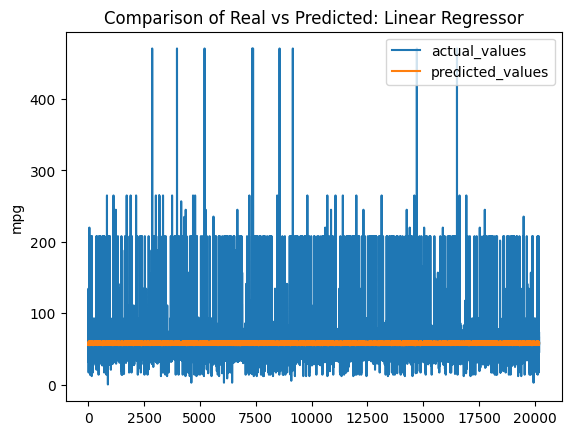

In [52]:
sns.lineplot(x = x, y = y_test, label = "actual_values");
sns.lineplot(x = x, y = lr_predict, label = "predicted_values");

plt.title("Comparison of Real vs Predicted: Linear Regressor");

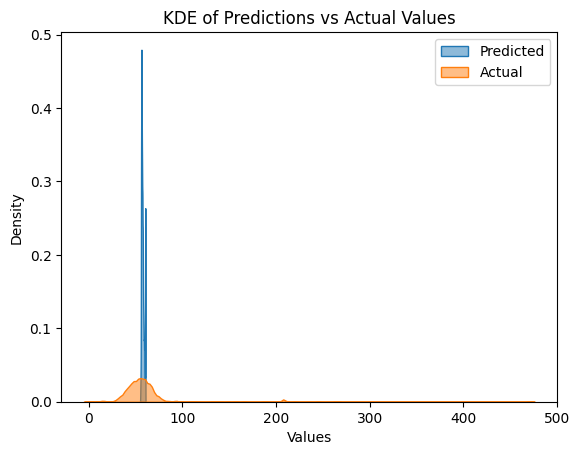

In [53]:
sns.kdeplot(lr_predict, label='Predicted', fill=True, alpha=0.5, bw_adjust=0.5);
sns.kdeplot(y_test, label='Actual', fill=True, alpha=0.5, bw_adjust=0.5);

plt.title("KDE of Predictions vs Actual Values");
plt.xlabel("Values");
plt.ylabel("Density");
plt.legend();
plt.show();

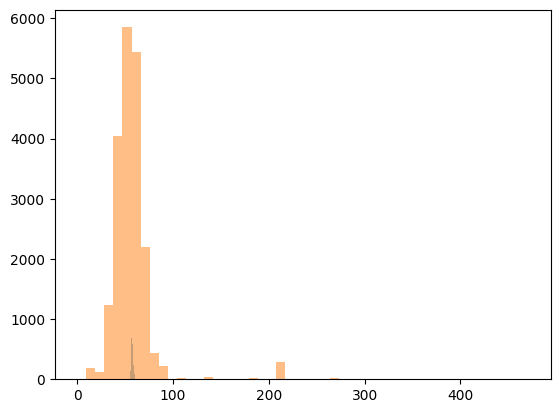

In [54]:
plt.hist(lr_predict, alpha = 0.5, bins= 50);
plt.hist(y_test, alpha = 0.5, bins = 50);

In [55]:
print("Intercept:", lr.intercept_)

Intercept: 57.41801840260073


In [56]:
print("Coefficients:", lr.coef_)


Coefficients: [1.2794412]


In [57]:
df_combined.select_dtypes("object").columns

Index(['model', 'fuelType', 'Manufacturer'], dtype='object')

In [58]:
df_combined.select_dtypes("object").agg(["nunique"])

,model,fuelType,Manufacturer
nunique,214,5,19


In [59]:
df_categorical = ['mpg','fuelType']
df_categorical_data = pd.DataFrame(df_combined[df_categorical])
mpg = df_combined['mpg']
print(df_categorical_data)

          mpg                                fuelType
0        60.1                                  Petrol
1        58.9                                  Petrol
2        49.6                                  Diesel
3        62.8                                  Diesel
4        54.3                                  Petrol
...       ...                                     ...
150296   14.0  Plug-in Hybrid Electric Vehicle (PHEV)
150304   93.0          Battery Electric Vehicle (BEV)
150322   14.0  Plug-in Hybrid Electric Vehicle (PHEV)
150445  208.0          Battery Electric Vehicle (BEV)
150468   93.0          Battery Electric Vehicle (BEV)

[100912 rows x 2 columns]


In [60]:
dummies = pd.get_dummies(df_categorical_data['fuelType'])
print(dummies)

        Battery Electric Vehicle (BEV)  Diesel  Hybrid  Petrol  \
0                                False   False   False    True   
1                                False   False   False    True   
2                                False    True   False   False   
3                                False    True   False   False   
4                                False   False   False    True   
...                                ...     ...     ...     ...   
150296                           False   False   False   False   
150304                            True   False   False   False   
150322                           False   False   False   False   
150445                            True   False   False   False   
150468                            True   False   False   False   

        Plug-in Hybrid Electric Vehicle (PHEV)  
0                                        False  
1                                        False  
2                                        False  
3          

In [61]:
data_dummies = pd.concat([df_categorical_data, dummies], axis = 1)
print(data_dummies)

          mpg                                fuelType  \
0        60.1                                  Petrol   
1        58.9                                  Petrol   
2        49.6                                  Diesel   
3        62.8                                  Diesel   
4        54.3                                  Petrol   
...       ...                                     ...   
150296   14.0  Plug-in Hybrid Electric Vehicle (PHEV)   
150304   93.0          Battery Electric Vehicle (BEV)   
150322   14.0  Plug-in Hybrid Electric Vehicle (PHEV)   
150445  208.0          Battery Electric Vehicle (BEV)   
150468   93.0          Battery Electric Vehicle (BEV)   

        Battery Electric Vehicle (BEV)  Diesel  Hybrid  Petrol  \
0                                False   False   False    True   
1                                False   False   False    True   
2                                False    True   False   False   
3                                False    True   Fa

In [62]:
del data_dummies['fuelType']

In [63]:
from sklearn import linear_model

f_with_trans = linear_model.LinearRegression(fit_intercept = False)
f_with_trans.fit(data_dummies, mpg)

LinearRegression(fit_intercept=False)

In [64]:
f_with_trans.coef_


array([ 1.00000000e+00, -4.82964628e-14, -1.42968783e-14, -2.35204199e-14,
        1.94735544e-15, -3.89592421e-15])

Evaluation

In [65]:
train_predictions = lr.predict(X_train)
test_predictions = lr.predict(X_test)

train_error = mean_squared_error(y_train, train_predictions)
test_error = mean_squared_error(y_test, test_predictions)

print(f"Training Error: {train_error}")
print(f"Testing Error: {test_error}")

Training Error: 660.5104233295616
Testing Error: 674.9194004601187


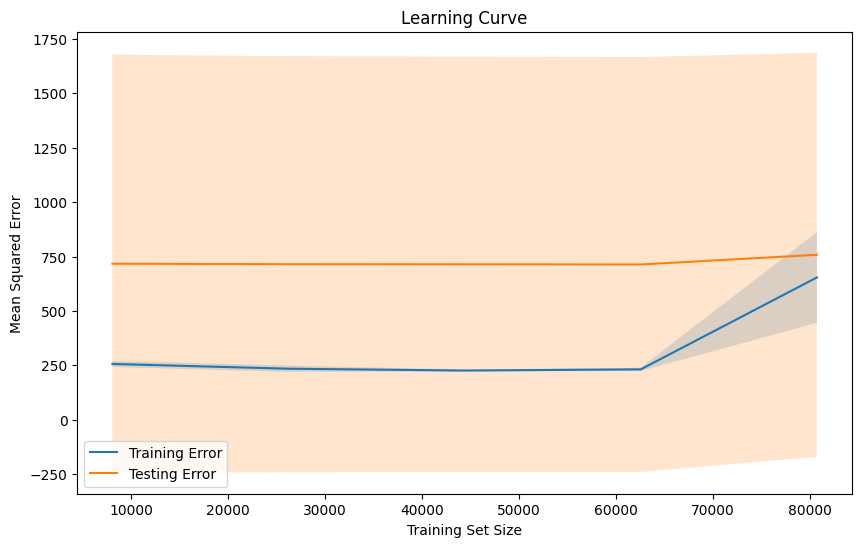

In [66]:
# Predict on training and test sets
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve


y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(lr, X, y, cv=5, scoring='neg_mean_squared_error')
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Print model evaluation
results = {
    "Training MSE": train_mse,
    "Testing MSE": test_mse,
    "Training R²": train_r2,
    "Testing R²": test_r2
}

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Error")
plt.plot(train_sizes, test_mean, label="Testing Error")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [67]:
r2_train = lr.score(X_train, y_train)  # R² on training data
r2_test = lr.score(X_test, y_test)  # R² on test data

print(f"Train R² Score: {r2_train}")
print(f"Test R² Score: {r2_test}")

Train R² Score: 0.0024719067763518954
Test R² Score: 0.003270464192551392
